## Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
iris_df = pd.read_csv("E:/🔥Generative AI Engineer🔥/Python/Supervised Learning/Logistic Regression/MultiClass Classification/Exercise/iris.csv")

In [5]:
print("Sample rows of the Iris dataset:")
iris_df.sample(5)

Sample rows of the Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
81,5.5,2.4,3.7,1.0,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
skewness = iris_df.skew(numeric_only=True)
kurtosis = iris_df.kurtosis(numeric_only=True)
mean = iris_df.mean(numeric_only=True)
median = iris_df.mean(numeric_only=True)

summary_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Mean': mean,
    'Median': median
})

print(summary_stats)

              Skewness  Kurtosis      Mean    Median
sepal_length  0.314911 -0.552064  5.843333  5.843333
sepal_width   0.334053  0.290781  3.054000  3.054000
petal_length -0.274464 -1.401921  3.758667  3.758667
petal_width  -0.104997 -1.339754  1.198667  1.198667


In [8]:
print("\nDistribution of species:")
print(iris_df['species'].value_counts())


Distribution of species:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


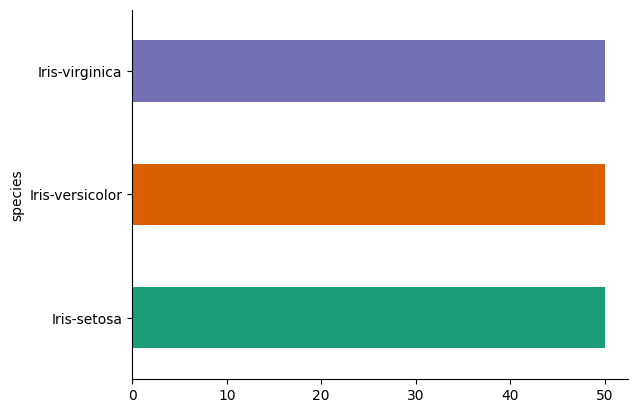

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
iris_df.groupby('species').size().plot(kind="barh", color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
print("\nMissing Values:")
iris_df.isnull().sum()


Missing Values:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
duplicate_rows = iris_df[iris_df.duplicated()]
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
iris_df = iris_df.drop_duplicates()

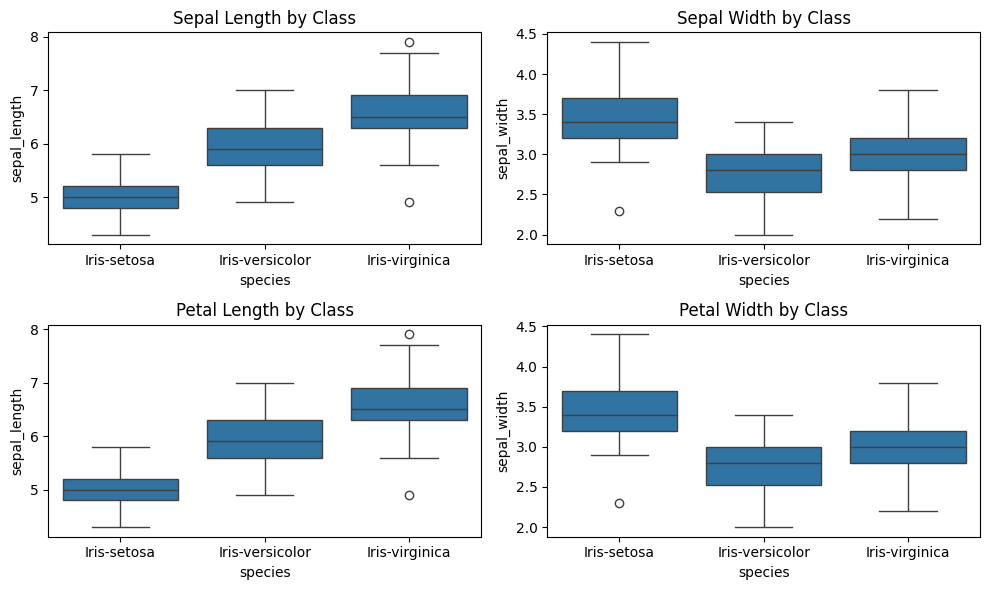

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=iris_df)
plt.title("Sepal Length by Class")

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.title('Sepal Width by Class')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.title('Petal Length by Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.title('Petal Width by Class')

plt.tight_layout()
plt.show()

In [14]:
print("\nDistribution of species:")
print(iris_df['species'].value_counts())


Distribution of species:
species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


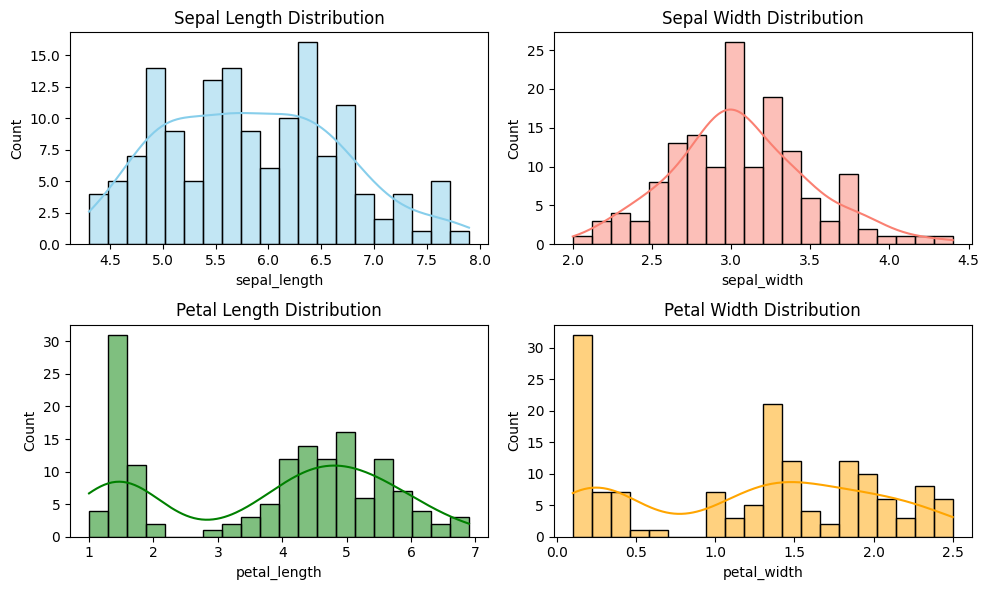

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(iris_df['sepal_length'], kde=True, bins=20, color='skyblue')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(iris_df['sepal_width'], kde=True, bins=20, color='salmon')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(iris_df['petal_length'], kde=True, bins=20, color='green')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(iris_df['petal_width'], kde=True, bins=20, color='orange')
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

## Not Useful

ValueError: 'hus1' is not a valid palette name

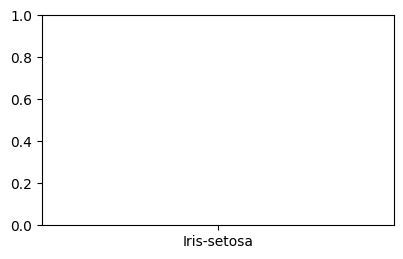

In [ ]:
'''

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', hue='species', y='sepal_length', data=iris_df, palette='hus1')
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', hue='species', y='sepal_width', data=iris_df, palette='hus1')
plt.title('Sepal Width')

plt.subplt(2, 2, 3)
sns.violinplot(x='species', hue='species', y='petal_length', data=iris_df, palette='hus1')
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='species', hue='species', y='petal_width', data=iris_df, palette='hus1')
plt.title('Petal Width')

plt.tight_layout()
plt.show()

'''

## ------------------------------------------------------------------------------------------------------------------------


In [19]:

X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (117, 4)
X_test (30, 4)
y_train (117,)
y_test (30,)


In [24]:
rf_classifier = RandomForestClassifier(random_state=42)

In [25]:
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = rf_classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [33]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


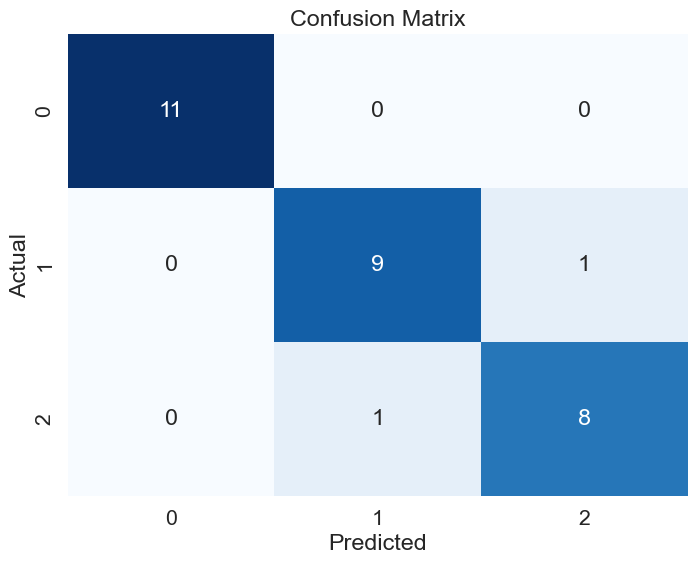

In [34]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
iris_df.iloc[0]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
Name: 0, dtype: object

In [36]:
sample_input = [[5.1, 3.5, 1.4, 0.2]]

predicted_label = rf_classifier.predict(sample_input)
predicted_species = label_encoder.inverse_transform(predicted_label)
print("True Species:")
print(iris_df.head(1))
print()
print("Sample Input:", sample_input)
print("Predicted Species:", predicted_species)

True Species:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa

Sample Input: [[5.1, 3.5, 1.4, 0.2]]
Predicted Species: ['Iris-setosa']


C:\Users\isuwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
predicted_species = label_encoder.inverse_transform(y_pred)
true_species = label_encoder.inverse_transform(y_test)
comparison_df = pd.DataFrame({'Predicted': predicted_species, 'True': true_species})
comparison_df

,Predicted,True
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-versicolor
9,Iris-setosa,Iris-setosa
